In [5]:
#House Price Prediction Regression Project

In [6]:
#Load libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
#load data
train_data_path = r"E:\BHARAT.DATA\padhai\carrier\Projects\House_Price_Prediction\data\train.csv"
test_data_path = r"E:\BHARAT.DATA\padhai\carrier\Projects\House_Price_Prediction\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)
print("shape of df_train", df_train.shape)   # it gives total rows and columns
print("shape of df_test", df_test.shape)

shape of df_train (1460, 81)
shape of df_test (1459, 80)


In [8]:
#to see total coulmn and rows                     None represent total 
pd.set_option("display.max_columns",None)  #  if  i replace  None with any number
pd.set_option("display.max_rows",None)     #  than that amount of rows and columns able to see 

In [9]:
df_train.head()  # default  5 rows dikhti hai  and columns bhi limited dekhte hai 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
# Know Your Data

In [12]:
# important columns  for house price
# will use this feature while converting into numerical format /Encoding
"""
Neighborhooh
OverallQual
Overallcond
YearBuilt
Foundation  *
Electrical
KitchenQual
GargeType
GarageFinish
Fence
"""

'\nNeighborhooh\nOverallQual\nOverallcond\nYearBuilt\nFoundation  *\nElectrical\nKitchenQual\nGargeType\nGarageFinish\nFence\n'

In [13]:
#Data Integration
#Data Integration is the process of combining data from 
# different sources to provide a unified view. This is often a 
# preprocessing step before training machine learning models.

In [14]:
# combine two data 
df = pd.concat([df_train,  df_test])
print("shape of integrated data/ DF",df.shape)

shape of integrated data/ DF (2919, 81)


In [15]:
# as we know that df_test having 80 column and   df_train having 81 columns 
# so  the one who not having columns  put null 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [16]:
# df.tail() is a pandas function
#  used in Python to view the last few rows of a DataFrame.
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [17]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [18]:
#get the breif information  of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [19]:
#most null value
#Alley 
#FireplaceQu
#PoolQC
#Fence
#MiscFeature

In [20]:
# i shape[0 ]  totala row ,, shape[1]  represent  total columns
int_features = df.select_dtypes(include=["int64"]).columns
print("Total number of integer feature :",int_features.shape[0])
print("Total  integers columns in list  :",int_features.tolist())

Total number of integer feature : 26
Total  integers columns in list  : ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [21]:
#getting columns that having data of float64
float_features = df.select_dtypes(include=["float64"]).columns
print("Total number of float feature :",float_features.shape[0])
print("Total float64 columns in list  :",float_features.tolist())

Total number of float feature : 12
Total float64 columns in list  : ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [22]:

cat_features = df.select_dtypes(include=["object"]).columns
print("Total number of categorical feature :",cat_features.shape[0])
print("Total categorical columns in list  :",cat_features.tolist())

Total number of categorical feature : 43
Total categorical columns in list  : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [23]:
# get the statistical information of numerical features


In [24]:
# df.describe() gives you the numerical summary of all numeric columns in your
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [25]:
df.describe().shape

(8, 38)

In [26]:
# note in count  not include null vlaue 


#If values are close to the mean, standard deviation is small.

#If values are far from the mean, standard deviation is large.
#Standard deviation measures the 
# "average distance" of each value from the mean.

#"Are the values tightly packed, or widely spread out?"

"""
raw : [1,3,4,2,5,6,8,7,9]
sot : [0,1,2,3,4,5,6,7,8,9]

1%(min)  = 0
25%  = 2.5
50%  = 4.5
75%  = 7.5
100%(max) = 9
"""

'\nraw : [1,3,4,2,5,6,8,7,9]\nsot : [0,1,2,3,4,5,6,7,8,9]\n\n1%(min)  = 0\n25%  = 2.5\n50%  = 4.5\n75%  = 7.5\n100%(max) = 9\n'

In [27]:
## Handling the missing values 

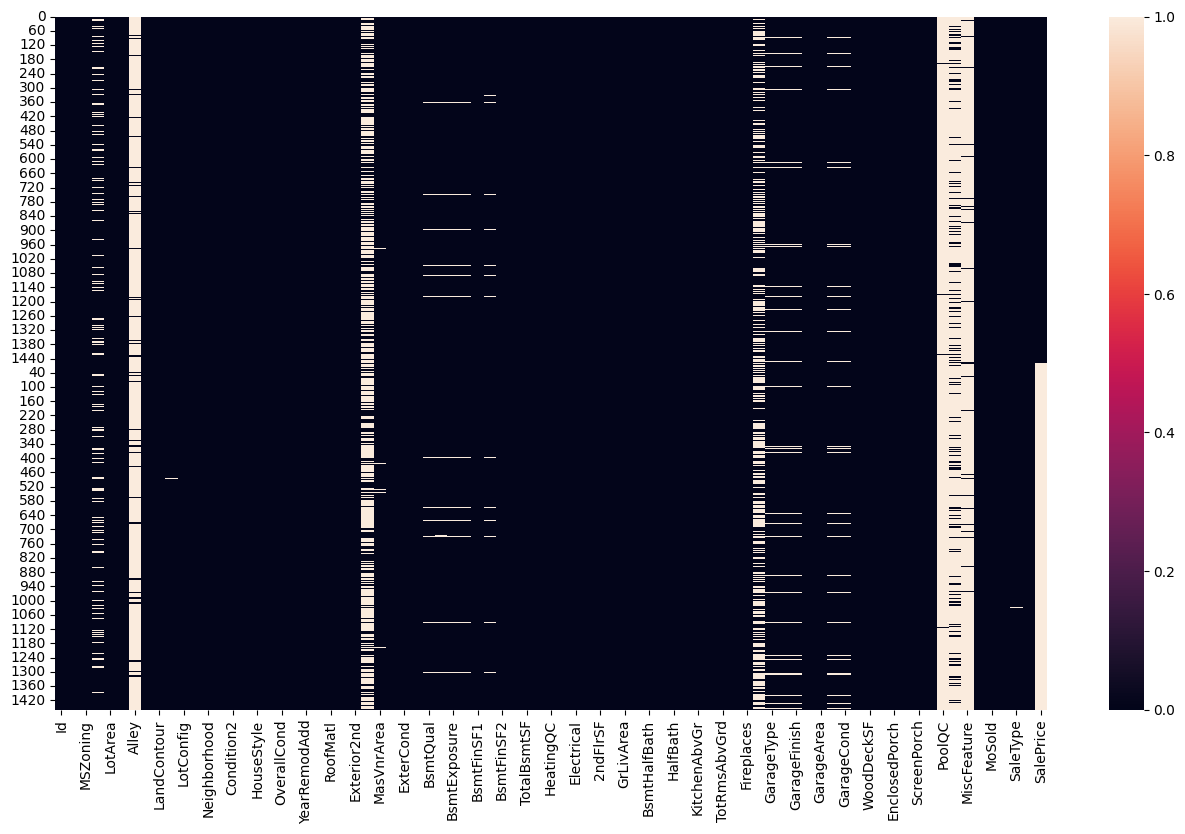

In [28]:
# visualise null/Missing value
plt.figure(figsize = (16,9))  # this create new figure for plotting
                                # and set size in inches 
                                # and this is function of matplotlib 

sns.heatmap(df.isnull())  # sns is a seaborn , which is built on top of matplotlib for better visuals
                            # it create heatmap

plt.savefig("EDA_img/heatmap_DF_of_null_values.png") # this saves the current figure as a PNG image
                                                    # EDA_img is folder name 
                                                    # and "heatmap_DF_of_null_values.png" is file name 
                                                    # this is function of matplotlib
                                                    


In [29]:
# get the null value percentage for every feature


In [30]:
# Set index as ID column       # as we know  we not get any infomation  to id  so we set as a index 
df = df.set_index("Id")

In [31]:
null_percent = df.isnull().sum()
print(null_percent)


MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [32]:
# aim to get percentage of null of each columns 

In [33]:
#self done
for i in df.columns:
    each_columns_total_null = df[i].isnull().sum()
    each_columns_total_data = df[i].size 
    each_columns_total_null_percent = (each_columns_total_null / each_columns_total_data) * 100
    print(i+" = " ,each_columns_total_null_percent , "%")

MSSubClass =  0.0 %
MSZoning =  0.1370332305584104 %
LotFrontage =  16.649537512846866 %
LotArea =  0.0 %
Street =  0.0 %
Alley =  93.21685508735868 %
LotShape =  0.0 %
LandContour =  0.0 %
Utilities =  0.0685166152792052 %
LotConfig =  0.0 %
LandSlope =  0.0 %
Neighborhood =  0.0 %
Condition1 =  0.0 %
Condition2 =  0.0 %
BldgType =  0.0 %
HouseStyle =  0.0 %
OverallQual =  0.0 %
OverallCond =  0.0 %
YearBuilt =  0.0 %
YearRemodAdd =  0.0 %
RoofStyle =  0.0 %
RoofMatl =  0.0 %
Exterior1st =  0.0342583076396026 %
Exterior2nd =  0.0342583076396026 %
MasVnrType =  60.500171291538194 %
MasVnrArea =  0.7879410757108599 %
ExterQual =  0.0 %
ExterCond =  0.0 %
Foundation =  0.0 %
BsmtQual =  2.774922918807811 %
BsmtCond =  2.8091812264474134 %
BsmtExposure =  2.8091812264474134 %
BsmtFinType1 =  2.7064063035286057 %
BsmtFinSF1 =  0.0342583076396026 %
BsmtFinType2 =  2.7406646111682083 %
BsmtFinSF2 =  0.0342583076396026 %
BsmtUnfSF =  0.0342583076396026 %
TotalBsmtSF =  0.0342583076396026 %
He

In [34]:
#done by master 
null_percent= df.isnull().sum()/df.shape[0] * 100
print(null_percent)

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [35]:
#drop columns / Feature

"""As per domin knowledge  we will not drop those ffeatures , instead None value 
we will add constant value 'NA' """
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [36]:
# as per i understand  many houses does not having  
# Alley  so deos it not having the vlaues so we not remove that data 
# bcz not haviing  alley in any house is also kind of data 
# so we replace the missing values 
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [37]:
"""As per domin knowledge  we will not drop FirePlaceQu ffeatures , instead None value 
we will add constant value 'NA' """
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 51)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [38]:
# miss_value_5_20_perc  this store the values in form of dictonary keys and vlaues

miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [39]:
#This line counts how many times each value appears 
# in the LotFrontage column of your dataset df.
df["LotFrontage"].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: ylabel='Id'>

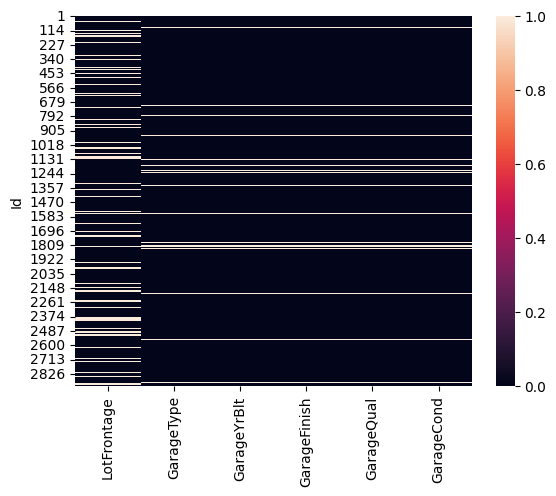

In [40]:
#  this visual show that  where the garge not present nothing each types present 
# like its type year of built  finsh quality condition 
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

In [41]:
# note  when our data having  missing vlaues less than 5% 
# we cannot we remove that data  
# if in case any columns haivng missing value more  than 5% than 
# we can analyissi that columns  and as per domain knowledge 
# we will analysis that we  remove that columns (data) or not 
""" always check domain knowledge  before decide to remove any columns as per their missing values"""
# their is no threshold method to remove missing value we need to go dip 
#inside the dataset and analysis which columns has to remove or not as per their missing values 

' always check domain knowledge  before decide to remove any columns as per their missing values'

In [42]:
### As per Observation we will not drop any feature from dataset

In [43]:
## Mssing Values  Imputation =
"""🎯 Filling in the missing (NaN) values in
 your dataset with something useful so that you can
 continue with data analysis or machine learning."""


'🎯 Filling in the missing (NaN) values in\n your dataset with something useful so that you can\n continue with data analysis or machine learning.'

In [44]:
missing_value_feat = null_percent[null_percent > 0]
print("total missing values ",missing_value_feat)

total missing values  MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64


In [ ]:
# in eailer  we already  seperate the featrues of int float and categorical 
# now from that we seperate the  missing values  

In [60]:
#  brother  as we know that  we already find out the int feature , float feature , catagorical feature
#categorical null feature
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("total number of categorical missing features = ", len(cat_na_feat))
cat_na_feat

total number of categorical missing features =  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [61]:
#int null features
int_na_feat=missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("total number of categorical missing features = ", len(int_na_feat))

total number of categorical missing features =  0


In [62]:
#float null  features
float_na_feat=missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("total number of categorical missing features = ", len(float_na_feat))

total number of categorical missing features =  12


In [ ]:
### handling missing vlaues from categorical data 
 

In [ ]:
### handling    MSZoning = 0.137033

In [ ]:
# in categorical data we have to focus not  mode vlaue (max frequency)

In [ ]:
# it tell basically  any rows came how much time 
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

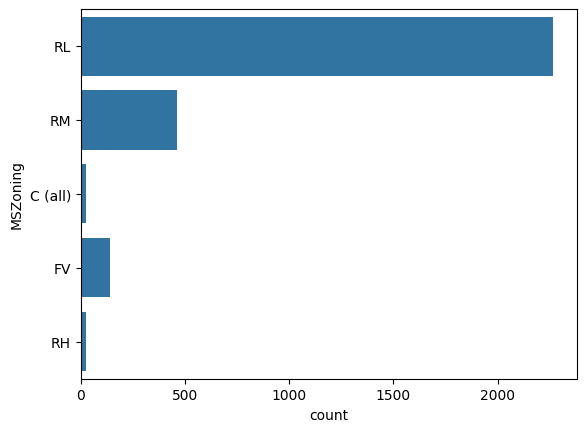

In [ ]:
sns.countplot(df["MSZoning"])  # count mean number of repeating rows in particular columns


In [80]:
### backup of original data
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [85]:
# mode of MsZofning
#np.nan stands for "Not a Number" — it's a special constant in NumPy (imported as np)
#  that represents missing or undefined numerical data.
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)
df_mvi["MSZoning"].isnull().sum()

np.int64(0)

In [92]:
def oldNewCountPlot(df, df_new , feature):
    plt.subplot(121)
    sns.countplot(df["MSZoning"])
    plt.title("Old Data Dustribution")
    plt.subplot(122)
    sns.countplot(df_new["MSZoning"])
    plt.title("New Data Distribution")

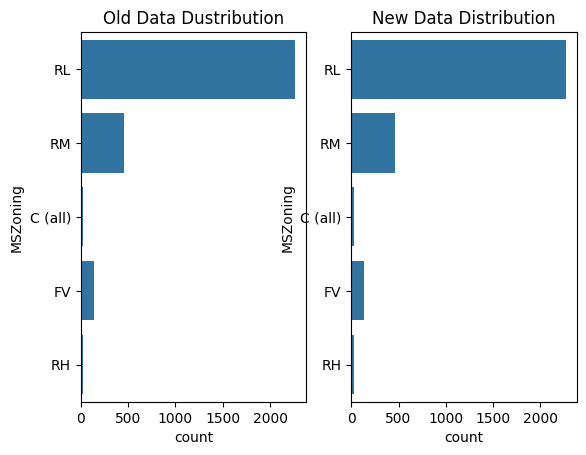

In [93]:
oldNewCountPlot(df , df_mvi  , "MSZoning")